### Name: Shilpa Gopalakrishnaiah

# Classification Task

# Table of contents

[PART A](#parta) <br>

1. [EDA](#eda)<br>
2. [Pre-Processing](#pp)<br>
3. [Util Methods](#util)<br>
4. [Modelling](#modelling)<br>
     - [Algo1 - Decission Tree](#dt)<br>
     - [Algo2 - Random Forest](#rf)<br>
     - [Algo3 - AdaBoostClassifier](#ada)]<br>
5. [Conclusion](#conclusion)<br>

[PART B](#partb) <br>

[Miscellaneous (Other algorithms tried)](#misc)<br>

# Brief on the work:

**Brief Introduction**:
  - Classification task on provided dataset
  - Performed EDA & Preprocessing(imputation)
  - Modellign 3 algorithms tried - DecisionTree, Random Forest(Bagging), AdaBoost(Boosting)

**Brief Result Summary**:
- Best Model - AdaBoost Classifier
- Future scope for improment by functional understanding and outlier treatment
    

#### About Dataset:

- 21 Independent variables, 1 boolean dependent variable
- 1 independent variable has 50% null
- 1000 records
- Classification problem


# Part A<a class="anchor" id="parta"></a>

In [ ]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

In [2]:
#Imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.utils import resample

from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score,  average_precision_score,plot_roc_curve,auc
from sklearn.metrics import classification_report,plot_confusion_matrix, confusion_matrix,f1_score

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold,StratifiedKFold

from sklearn.neural_network import MLPClassifier
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import GradientBoostingClassifier
from sklearn.ensemble     import AdaBoostClassifier
from sklearn.ensemble     import RandomForestClassifier

from IPython.display import display

from joblib import dump, load
import time

#### Import data from CSV

In [561]:
df = pd.read_csv('P1_Data.csv')
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,1.6430,0,-4894.24,-13.0281,-4.793400,0,5.1270,-17.1100,-63.340,3.61690,...,5.783440,-11315.46,22912.53,-0.4,103811.34,5.4380,1747.920,-4879.68,-41.58,False
1,0.5310,0,-5085.44,-16.2210,-3.991776,0,4.6256,-4.5800,-10.314,3.64880,...,8.180000,-12852.96,25696.44,-0.4,103884.02,5.0960,1496.080,-4186.38,-45.96,True
2,0.2640,0,-7021.44,-11.7591,-6.161700,0,4.3628,-14.7118,-6.806,3.62830,...,5.760312,-11012.16,20232.84,-1.4,103987.08,2.3652,1523.412,-4067.28,NaN,False
3,0.3196,1,-4648.76,-11.8110,-4.217700,0,8.9380,-7.5360,-4.670,3.01503,...,6.437100,-10297.86,23592.84,-1.4,103842.08,4.4080,1506.810,1352.52,NaN,True
4,4.0800,0,-4877.20,-11.2635,-8.061000,1,6.2800,-14.5805,-45.920,3.60030,...,6.393200,-11527.38,24778.74,-1.4,103842.48,3.1334,1581.790,-5095.88,-45.93,True


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,1.6430,0,-4894.24,-13.0281,-4.793400,0,5.1270,-17.1100,-63.340,3.61690,...,5.783440,-11315.46,22912.53,-0.4,103811.34,5.4380,1747.920,-4879.68,-41.58,False
1,0.5310,0,-5085.44,-16.2210,-3.991776,0,4.6256,-4.5800,-10.314,3.64880,...,8.180000,-12852.96,25696.44,-0.4,103884.02,5.0960,1496.080,-4186.38,-45.96,True
2,0.2640,0,-7021.44,-11.7591,-6.161700,0,4.3628,-14.7118,-6.806,3.62830,...,5.760312,-11012.16,20232.84,-1.4,103987.08,2.3652,1523.412,-4067.28,NaN,False
3,0.3196,1,-4648.76,-11.8110,-4.217700,0,8.9380,-7.5360,-4.670,3.01503,...,6.437100,-10297.86,23592.84,-1.4,103842.08,4.4080,1506.810,1352.52,NaN,True
4,4.0800,0,-4877.20,-11.2635,-8.061000,1,6.2800,-14.5805,-45.920,3.60030,...,6.393200,-11527.38,24778.74,-1.4,103842.48,3.1334,1581.790,-5095.88,-45.93,True


<div class="alert alert-warning">

# 1 - EDA<a class="anchor" id="eda"></a>

### 1.1 Statistics

In [445]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,500.000000
mean,1.067873,0.507000,-5361.832102,-13.230040,-6.313792,0.481000,5.890532,-14.141708,-20.424599,3.938608,...,-3.621917,6.244264,-11630.293754,24105.732399,-0.929000,103949.541430,3.988717,1451.053607,-3933.396979,-44.650560
std,0.902763,0.500201,1494.941683,2.560369,1.842535,0.499889,1.799838,4.861641,20.571395,0.901204,...,1.805553,0.671938,1534.747192,3111.533532,0.499408,3376.459607,1.739357,246.538717,1405.781722,3.188244
min,0.112200,0.000000,-15323.440000,-23.889000,-14.613000,0.000000,3.942760,-29.850000,-163.680000,3.002990,...,-10.616000,5.760001,-23402.760000,10433.640000,-1.400000,96416.660000,2.144440,-139.080000,-11393.480000,-54.960000
25%,0.396475,0.000000,-5523.540000,-14.325000,-7.453500,0.000000,4.487150,-17.209750,-26.025000,3.261825,...,-4.447000,5.803685,-12032.460000,22905.300000,-1.400000,103814.590000,2.686650,1437.582500,-4495.635000,-46.875000
50%,0.783700,1.000000,-4984.540000,-12.416250,-5.912250,0.000000,5.309600,-14.180050,-14.284000,3.657250,...,-3.064500,5.993600,-11597.425500,23486.040000,-1.400000,103852.225000,3.478100,1504.890000,-4210.100000,-44.505000
75%,1.464250,1.000000,-4731.133500,-11.337000,-4.853100,1.000000,6.856500,-11.066750,-6.504000,4.307000,...,-2.234900,6.399525,-11223.660000,24446.265000,-0.400000,103890.880000,4.759000,1537.961250,-3746.730000,-42.450000
max,4.602000,1.000000,2722.560000,-10.533870,-3.991776,1.000000,12.744000,5.030000,-0.124656,7.555000,...,-1.644240,11.578000,-1190.760000,47423.640000,-0.400000,209390.660000,11.170000,3091.920000,5696.520000,-34.530000


In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   int64  
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   int64  
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   float64
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     1000 non-null   float64
 20  F21     500 non-null    float64
 21  Class   1000 non-null   bool   
dtypes

- Null values exists in the dataset

In [9]:
df.isnull().values.any()

True

### 1.2 Missing data analysis

50% of F21 column data is missing. As we do not know the domain of data(the functional meaning of each column), rather than imputing with data, I plan to drop the column "F21"

In [562]:
# Percentage of null values in each column of the dataframe
percent_missing = df. isnull(). sum() * 100 / len(df)
missing_value_df = pd. DataFrame({'column_name': df. columns,'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
F1,F1,0.0
F2,F2,0.0
F3,F3,0.0
F4,F4,0.0
F5,F5,0.0
F6,F6,0.0
F7,F7,0.0
F8,F8,0.0
F9,F9,0.0
F10,F10,0.0


### 1.3 Correlation among features

**Analysis**
- No high correlation between Independent and Dependent features
- No Multi collinearity

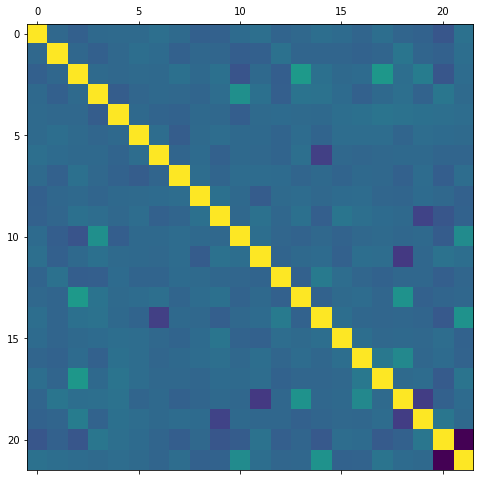

In [563]:
corr = df.corr() 

# Plot heatmap of correlation
f = plt.figure(figsize=(8, 8))
plt.matshow(df.corr(),fignum=f.number)
plt.show()

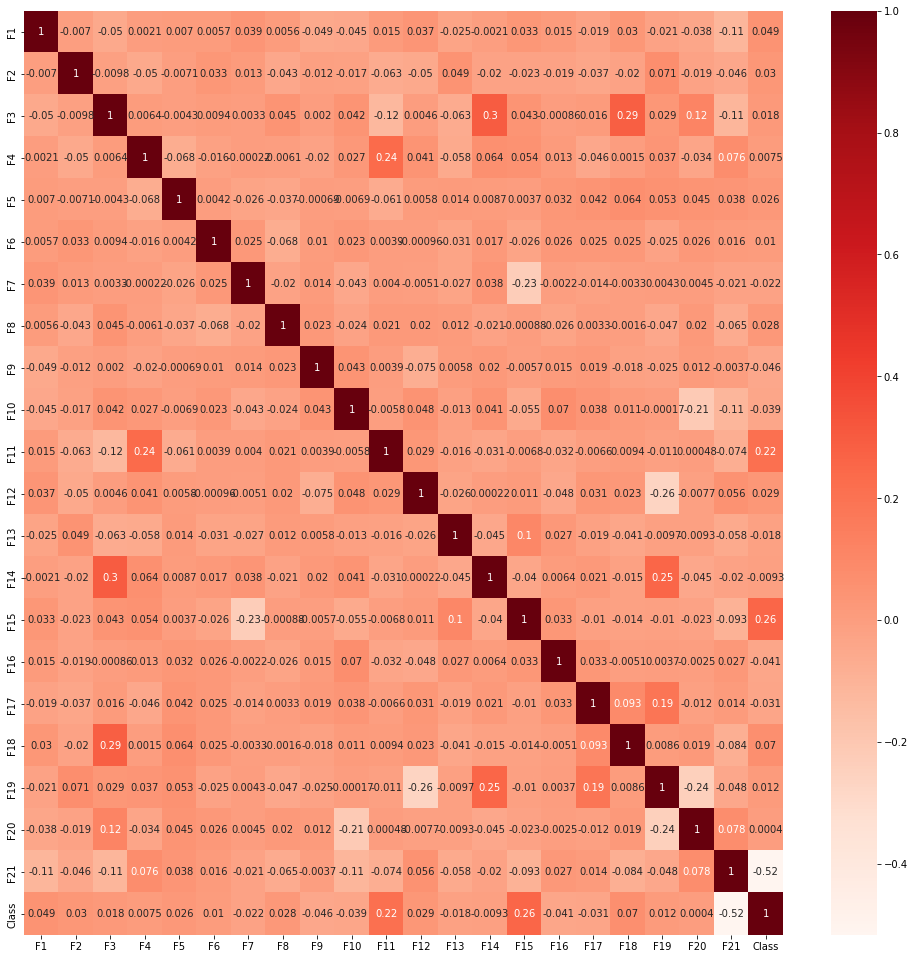

In [564]:
plt.figure(figsize=(17,17))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### 1.4 Visualize Outliers

- Few columns have outliers, but due to lack of information on data and because of the fact that I used Tree based algorithms for modelling, I have no done explicit outlier treatment. 
- Tree based algorithms handle outlier  implicitly. Only distance based algorithms are impaced by outliers.

<AxesSubplot:>

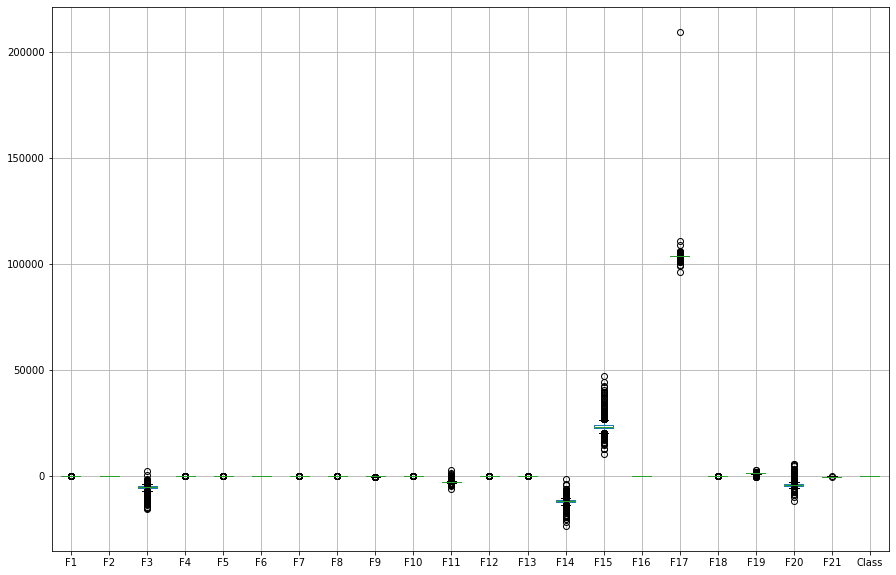

In [565]:
df.boxplot( figsize =(15, 10))

#### 1.5 Class balanced?

**Analysis:** 

- Classes are balanced as per the percentage plot

- As the data is balanced, during modelling, Accuracy can be used as scoring metric. ( No need to give importance to Precision Recall as the class is balanced)

False Class count -  494
True Class Count -  506
----------------------------------------
Ratio of Classes
----------------------------------------
True     0.506
False    0.494
Name: Class, dtype: float64


<AxesSubplot:title={'center':'Class vs Count'}, xlabel='Class', ylabel='Count'>

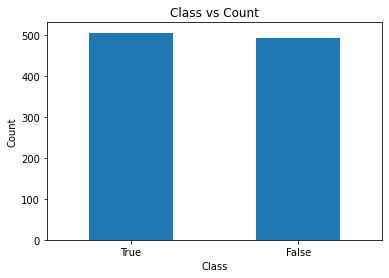

In [35]:
#Visulaize Fraud to Non Fraud Ratio

df_false = df[df.Class == False] 
df_true = df[df.Class == True] 
print("False Class count - ",len(df_false))
print("True Class Count - ",len(df_true))
print("-"*40)
# Count the occurrences of fraud and non fraud cases
fnf = df["Class"].value_counts()
print("Ratio of Classes")
print("-"*40)
print(fnf/len(df))

# Plottingg your data
plt.xlabel("Class")
plt.ylabel("Count")
fnf.plot(kind = 'bar',title = 'Class vs Count',rot=0)

#### 1.6 Data distribution?

Data distribution does not matter here because I am planning to use Tree based algorithms for classification.

<div class="alert alert-warning">
    
# 2 - PreProcessing<a class="anchor" id="pp"></a>

### 2.1 Imputation of  missing data in column "F21" - Imputation method Iterative Imputer

- Use Iterative Imputer for imputing missing values, This algorithm imputes the missing values in the columns iteratively.
- It is a Multivariate imputer that estimates each feature from all the others.
- It is a strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

In [566]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
df1=imp.fit_transform(df)

[IterativeImputer] Completing matrix with shape (1000, 22)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.04
[IterativeImputer] Change: 17.59533896592079, scaled tolerance: 209.39066 
[IterativeImputer] Early stopping criterion reached.


In [610]:
#imp=imp.fit(df)

In [453]:
df1.shape, type(df1)

((1000, 22), numpy.ndarray)

In [567]:
df = pd.DataFrame(df1, index=df.index, columns=df.columns)

In [568]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,1.6430,0.0,-4894.24,-13.0281,-4.793400,0.0,5.1270,-17.1100,-63.340,3.61690,...,5.783440,-11315.46,22912.53,-0.4,103811.34,5.4380,1747.920,-4879.68,-41.580000,0.0
1,0.5310,0.0,-5085.44,-16.2210,-3.991776,0.0,4.6256,-4.5800,-10.314,3.64880,...,8.180000,-12852.96,25696.44,-0.4,103884.02,5.0960,1496.080,-4186.38,-45.960000,1.0
2,0.2640,0.0,-7021.44,-11.7591,-6.161700,0.0,4.3628,-14.7118,-6.806,3.62830,...,5.760312,-11012.16,20232.84,-1.4,103987.08,2.3652,1523.412,-4067.28,-42.056165,0.0
3,0.3196,1.0,-4648.76,-11.8110,-4.217700,0.0,8.9380,-7.5360,-4.670,3.01503,...,6.437100,-10297.86,23592.84,-1.4,103842.08,4.4080,1506.810,1352.52,-45.187017,1.0
4,4.0800,0.0,-4877.20,-11.2635,-8.061000,1.0,6.2800,-14.5805,-45.920,3.60030,...,6.393200,-11527.38,24778.74,-1.4,103842.48,3.1334,1581.790,-5095.88,-45.930000,1.0


#### Plot correlation plot afr imputation
- Correlation between Target and F21 increased after imputation

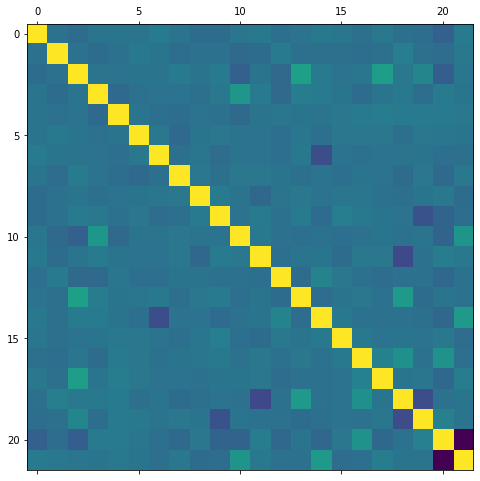

In [569]:
corr = df.corr() 

# Plot heatmap of correlation
f = plt.figure(figsize=(8, 8))
plt.matshow(df.corr(),fignum=f.number)
plt.show()

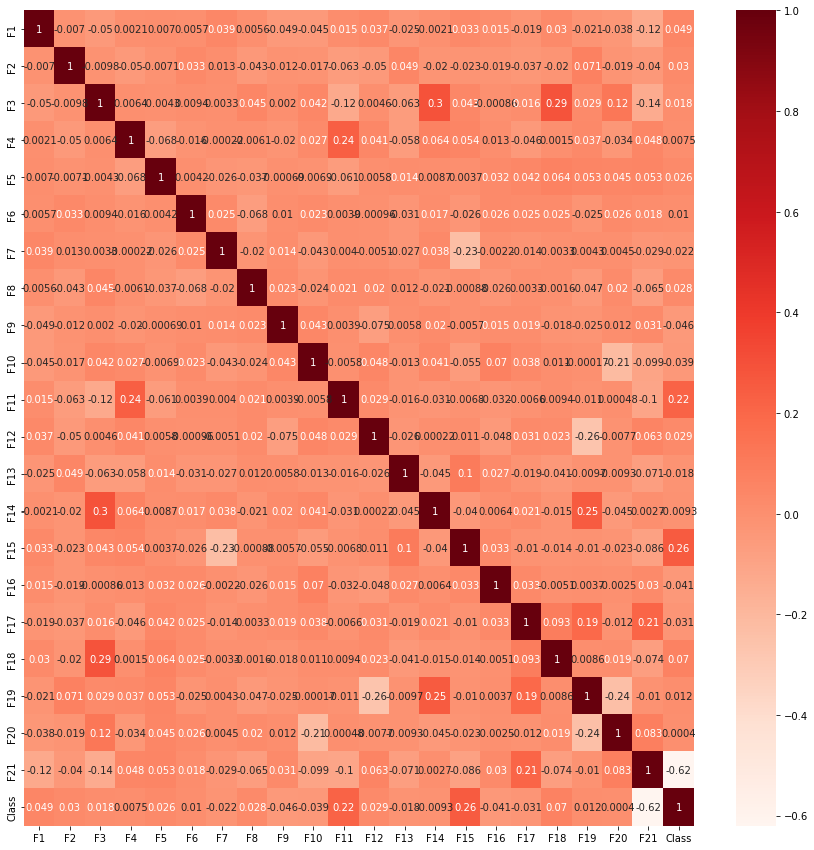

In [570]:
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### 2.2 Feature Scaling

**Analysis**: As I plan to apply Decision Tree, feature scaling is not required. But later, if I plan to use distance based algorithm, then I apply feature scaling. 

### 2.3 Prepare data for training - Train Test Split

Make Class column boolean 0 & 1

In [103]:
df['Class'].head(5)

0    False
1     True
2    False
3     True
4     True
Name: Class, dtype: bool

In [458]:
df['Class'] = [1 if x == True else 0 for x in df['Class']]
df['Class'].head(5)

0    0
1    1
2    0
3    1
4    1
Name: Class, dtype: int64

In [465]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=34)

In [466]:
y_train

690    1
801    0
522    1
763    0
990    0
      ..
758    1
873    0
490    0
122    1
417    0
Name: Class, Length: 750, dtype: int64

### Feature selection
- Tried feature selection with modelling, but feature selection dint not improve model accuracy, so feature selection is not applied while modelling, but I tried it to check if it improves modelling.
- No feature selection applied on the 3 models

In [517]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

In [518]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=12)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.822 (0.041)


<div class="alert alert-warning">

# 3 - Utility methods - for evaluating model<a class="anchor" id="util"></a>

 - Util methods for model evaluation, During evaluation, respective methods are called to print Accuracy, ROC curve

In [550]:
# Function to print model score, Classification Report & confusion matrix 
def print_model_metrics(mdl, X, y, title):
    p=mdl.predict(X)
    target_names = ['0', '1']
    print("Model score accuracy--", mdl.score(X, y))
    print("Balanced accuracy--",metrics.balanced_accuracy_score(y,p))
    print("Precision--",metrics.precision_score(y,p))
    print("roc_auc_score--",roc_auc_score(y, p))
    print("Recall_score--",metrics.recall_score(y, p))
    print("f1-",f1_score(y, p))    
    print(classification_report(y,p,target_names=target_names))
    print(confusion_matrix(y,p))
    disp = plot_confusion_matrix(mdl, X, y,display_labels=target_names,normalize='true')
    disp.ax_.set_title(title)


# Function to plot ROC curve & Precision-Recall curve
def print_model_curve(mdl, X, y, mdlname):
    print("Plot for ",mdlname)
    #plot_roc_curve(mdl, X, y)
    p=mdl.predict(X)
    fpr, tpr, _ = roc_curve(y, p)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC AUC = ' + str(round(roc_auc, 2)))
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.plot([0, 1], [0, 1],linestyle='--')
    disp = plot_precision_recall_curve(mdl, X, y)
    
# Function to plot only Confusion Matrix    
def print_cm(mdl, X, y):
    p=mdl.predict(X)
    print(confusion_matrix(y,p,normalize=True))

# Function to plot single ROC Curve 
def single_rocauc_curve(mdl, X, y, mdl_name): 
    p1=mdl.predict(X)
    fpr1, tpr1, _ = roc_curve(y, p1)
    roc_auc1 = auc(fpr1, tpr1)
    plt.plot(fpr1, tpr1, label=mdl_name +' auc = ' + str(round(roc_auc1, 2)))
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.plot([0, 1], [0, 1],linestyle='--')    

<div class="alert alert-warning">

# 4 - Modelling<a class="anchor" id="modelling"></a>

<div class="alert alert-info">

## 4.1 Algorithm 1 - Decision Tree classifier<a class="anchor" id="dt"></a>

- Decision Tree is a tree based algorithm
- The algorithm works by created trees untill leaf node is reached, each split in the tree is constructed so as ti minize the entropy and maximize the information gain.
- Decision Tree has a tendency to over fit as it just creates a single tree( as compared to Ensemble methods where multiple Decision trees are created and the result is averaged)

#### 4.1.1 DT Perform Grid Search with KFold Cross Validation

In [571]:
# Grid search hyper parameters
dt_grid_params = {
    "criterion": ['gini', 'entropy'],
    "splitter": ['best', 'random'],
    "max_depth"          : [30,40,60],  
    "min_samples_split"  : [5, 10,20,30], 
    'min_samples_leaf'   : [1,5,10,30],
    'max_leaf_nodes': [2,5,10,20,30]
}

dt_mdl =DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
clf_dt_grid = GridSearchCV(estimator=dt_mdl, cv=cv,param_grid=dt_grid_params, scoring='accuracy' ,n_jobs=-1,verbose=3)
clf_dt_grid.fit(X_train, y_train)
best_scores_dt_grid = clf_dt_grid.best_score_
best_params_dt_grid = clf_dt_grid.best_params_  
print("Best parameters:", best_params_dt_grid)
print("Best score:" , best_scores_dt_grid)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits
Best parameters: {'criterion': 'gini', 'max_depth': 40, 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'best'}
Best score: 0.8646666666666667


#### 4.1.2  DT - with best hyper parameters

In [513]:
dt_final_mdl=DecisionTreeClassifier(criterion='gini', max_depth= 40, max_leaf_nodes= 10, min_samples_leaf= 5, min_samples_split= 5, splitter= 'best')
dt_final_mdl.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=40, max_leaf_nodes=10, min_samples_leaf=5,
                       min_samples_split=5)

#### 4.1.3 DT - Feature Importance

- Printing the features that the Decision Tree rated the most during modelling

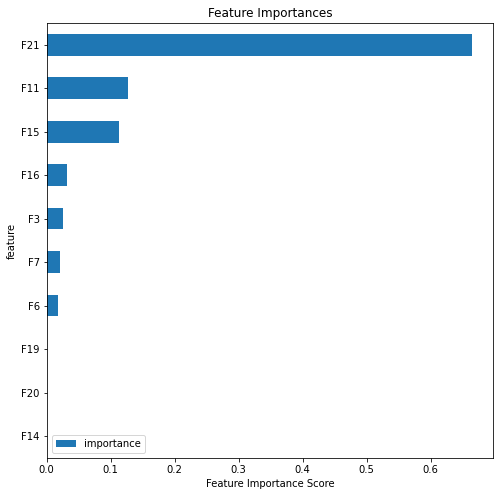

Top 10 features in descending order of importance


,importance
feature,
F21,0.664418
F11,0.126338
F15,0.113256
F16,0.031942
F3,0.025624
F7,0.021124
F6,0.017298
F14,0.000000
F20,0.000000


In [572]:
feat_imp = pd.DataFrame({'importance':dt_final_mdl.feature_importances_})    
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
top_n = 10
title="Feature Importances"
figsize=(8,8)
feat_imp = feat_imp.iloc[:top_n]

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title=title, figsize=figsize)
plt.xlabel('Feature Importance Score')
plt.show()

print("Top {} features in descending order of importance".format(top_n))
display(feat_imp.sort_values(by='importance', ascending=False))

#### 4.1.4 DT - Evaluate Train set

- DT resulted in Accuracy = 90%, ROC = 91% on Train set

-------Train Evaluation-------
Model score accuracy-- 0.9093333333333333
Balanced accuracy-- 0.9093333333333333
Precision-- 0.9028871391076115
roc_auc_score-- 0.9093333333333333
Recall_score-- 0.9173333333333333
f1- 0.9100529100529099
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       375
           1       0.90      0.92      0.91       375

    accuracy                           0.91       750
   macro avg       0.91      0.91      0.91       750
weighted avg       0.91      0.91      0.91       750

[[338  37]
 [ 31 344]]


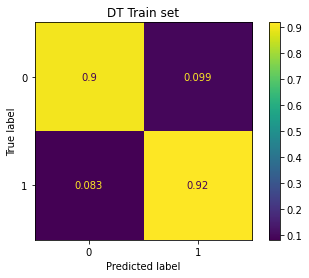

In [573]:
print("-------Train Evaluation-------")
print_model_metrics(dt_final_mdl, X_train.values,y_train,"DT Train set")

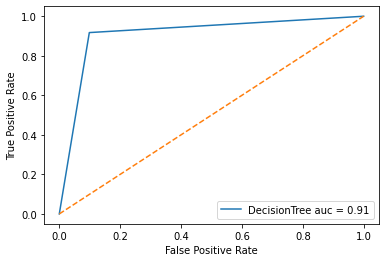

In [575]:
single_rocauc_curve(dt_final_mdl, X_train.values,y_train, "DecisionTree")

#### 4.1.5 DT - Evaluate Test set

- DT resulted in Accuracy = 88%, ROC = 88% on Test set
- No over fitting, but with better hyper parameter tuning, model can be improved to get better accuracy

-------Test set Evaluation-------
Model score accuracy-- 0.876
Balanced accuracy-- 0.8751363140676118
Precision-- 0.8731343283582089
roc_auc_score-- 0.8751363140676118
Recall_score-- 0.8931297709923665
f1- 0.8830188679245283
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       119
           1       0.87      0.89      0.88       131

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

[[102  17]
 [ 14 117]]


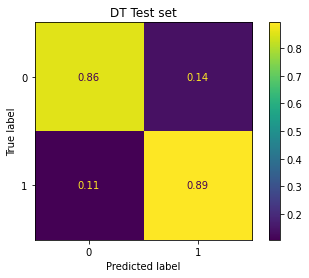

In [516]:
print("-------Test set Evaluation-------")
print_model_metrics(dt_final_mdl, X_test.values,y_test,"DT Test set")

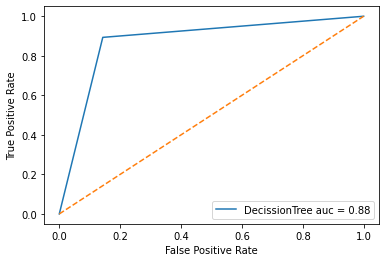

In [554]:
single_rocauc_curve(dt_final_mdl, X_test.values,y_test, "DecissionTree")

<div class="alert alert-info">

## 4.2 Algorithm 2 - Random Forest (Ensemble algorithm - Bagging)<a class="anchor" id="rf"></a>

- Random Forest is an ensemble bagging algorithm. This helps to reduce varaince which occurs generally in Decision Tree.
- Random Forest generally is better algorithm compared to Decision Tree where multiple Decision Trees are created and the result is averaged to come up with a classification score.

#### 4.2.1  RandomForest -  Grid Search with KFold Cross Validation

In [576]:
# RandomForest Grid search parameters
rf_grid_params = {
   # "criterion": ['gini', 'entropy'],
   # "splitter": ['best', 'random'],
    "max_depth"          : [60,80,90],  
     'max_leaf_nodes': [1,5,10,30,50,60],
     'min_samples_leaf'   : [1,5,10,30],
    "min_samples_split"  : [ 1,10,30,50],    
    'warm_start': [True]
}

rf_mdl =RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
clf_rf_grid = GridSearchCV(estimator=rf_mdl, cv=cv,param_grid=rf_grid_params, scoring='accuracy' ,n_jobs=-1,verbose=3)
clf_rf_grid.fit(X_train, y_train)
best_scores_rf_grid = clf_rf_grid.best_score_
best_params_rf_grid = clf_rf_grid.best_params_  
print("Best parameters:", best_params_rf_grid)
print("Best score:" , best_scores_rf_grid)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
Best parameters: {'max_depth': 60, 'max_leaf_nodes': 30, 'min_samples_leaf': 1, 'min_samples_split': 30, 'warm_start': True}
Best score: 0.884


#### 4.2.2 RandomForest - Fit with best hyper parameters

In [579]:
rf_final_mdl=RandomForestClassifier( max_depth= 60, max_leaf_nodes= 50, min_samples_leaf= 1, min_samples_split= 10)
rf_final_mdl.fit(X_train, y_train)

RandomForestClassifier(max_depth=60, max_leaf_nodes=50, min_samples_split=10)

#### 4.2.3 RandomForest  - Evaluate Train set

- RandomForest resulted in 97% accuracy, ROC=97% which is acceptable.

------- Random Forest Train Evaluation-------
Model score accuracy-- 0.9773333333333334
Balanced accuracy-- 0.9773333333333334
Precision-- 0.9661458333333334
roc_auc_score-- 0.9773333333333333
Recall_score-- 0.9893333333333333
f1- 0.9776021080368906
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       375
           1       0.97      0.99      0.98       375

    accuracy                           0.98       750
   macro avg       0.98      0.98      0.98       750
weighted avg       0.98      0.98      0.98       750

[[362  13]
 [  4 371]]


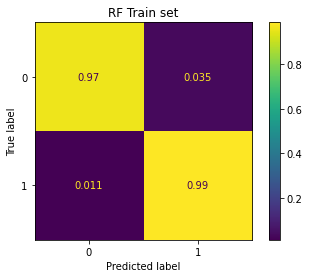

In [581]:
print("------- Random Forest Train Evaluation-------")
print_model_metrics(rf_final_mdl, X_train.values,y_train,"RF Train set")

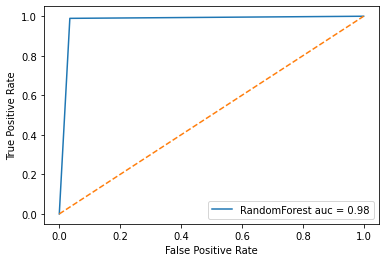

In [583]:
single_rocauc_curve(rf_final_mdl, X_train.values,y_train, "RandomForest")

#### 4.2.4  RandomForest - Evaluate Test set

- RandomForest resulted in 89% accuracy, ROC=89% on test set, the accuracy reduced on test set, this is due to model being overfit.
- Better hyper parameter tuning can reduce overfitting.

-------RandomForest Test set Evaluation-------
Model score accuracy-- 0.892
Balanced accuracy-- 0.8911732631984091
Precision-- 0.8880597014925373
roc_auc_score-- 0.8911732631984091
Recall_score-- 0.9083969465648855
f1- 0.8981132075471697
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       119
           1       0.89      0.91      0.90       131

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250

[[104  15]
 [ 12 119]]


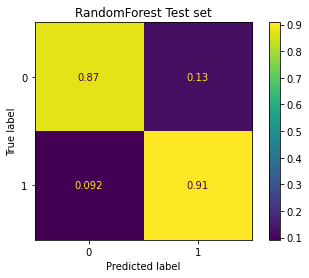

In [584]:
print("-------RandomForest Test set Evaluation-------")
print_model_metrics(rf_final_mdl, X_test.values,y_test,"RandomForest Test set")

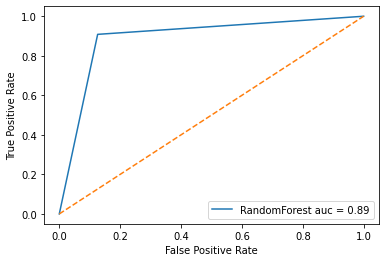

In [585]:
single_rocauc_curve(rf_final_mdl, X_test.values,y_test, "RandomForest")

<div class="alert alert-info">

## 4.3 - Algorithm 3 - AdaBoost (Ensemble algorithm - Bagging + Boosting)<a class="anchor" id="ada"></a>

- An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
- AdaBoost is a ensemble boosting technique which punishes the wrong predictions in the previous step
- It can be considered as a advanced version of Decision Tree and Random Forest. 
- General drawback of AdaBoost is that without proper hyper parameter tuning, it tends to overfit. So, hyper parameter tuning should be done with care. 

#### 4.3.1 Perform RandomForest Grid Search with KFold Cross Validation

In [587]:
base_mdl =DecisionTreeClassifier()

#AdaBoost Grid search parameters
ada_grid_params = {
    "base_estimator": [base_mdl,dt_final_mdl],
    "n_estimators": [100],
    "learning_rate"          : [0.01,0.1,1,0.001],  
    "algorithm"  : ['SAMME', 'SAMME.R'], 
    "random_state"   : [33]
}

ada_mdl=AdaBoostClassifier()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
clf_ada_grid = GridSearchCV(estimator=ada_mdl, cv=cv,param_grid=ada_grid_params, scoring='accuracy' ,n_jobs=-1,verbose=3)
clf_ada_grid.fit(X_train, y_train)
best_scores_ada_grid = clf_ada_grid.best_score_
best_params_ada_grid = clf_ada_grid.best_params_  
print("Best parameters:", best_params_ada_grid)
print("Best score:" , best_scores_ada_grid)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best parameters: {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=40, max_leaf_nodes=10, min_samples_leaf=5,
                       min_samples_split=5), 'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 33}
Best score: 0.8886666666666667


#### 4.3.3 Fit AdaBoost with best hyper parameters

In [591]:
ada_final_mdl=AdaBoostClassifier(base_estimator=dt_final_mdl, learning_rate= 0.01,  n_estimators= 100, algorithm= 'SAMME')
ada_final_mdl.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=40,
                                                         max_leaf_nodes=10,
                                                         min_samples_leaf=5,
                                                         min_samples_split=5),
                   learning_rate=0.01, n_estimators=100)

#### 4.3.4 AdaBoost - Evaluate Train set

-------AdaBoost Train Evaluation-------
Model score accuracy-- 0.912
Balanced accuracy-- 0.9119999999999999
Precision-- 0.9076517150395779
roc_auc_score-- 0.9119999999999999
Recall_score-- 0.9173333333333333
f1- 0.9124668435013262
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       375
           1       0.91      0.92      0.91       375

    accuracy                           0.91       750
   macro avg       0.91      0.91      0.91       750
weighted avg       0.91      0.91      0.91       750

[[340  35]
 [ 31 344]]


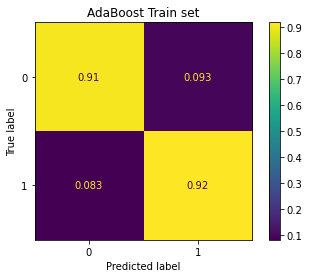

In [594]:
print("-------AdaBoost Train Evaluation-------")
print_model_metrics(ada_final_mdl, X_train.values,y_train,"AdaBoost Train set")

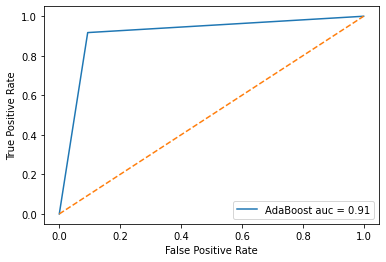

In [596]:
single_rocauc_curve(ada_final_mdl, X_train.values,y_train, "AdaBoost")

#### 4.3.5 AdaBoost - Evaluate Test set

-------AdaBoost Test set Evaluation-------
Model score accuracy-- 0.912
Balanced accuracy-- 0.9114118930014754
Precision-- 0.9097744360902256
roc_auc_score-- 0.9114118930014755
Recall_score-- 0.9236641221374046
f1- 0.9166666666666667
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       119
           1       0.91      0.92      0.92       131

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[107  12]
 [ 10 121]]


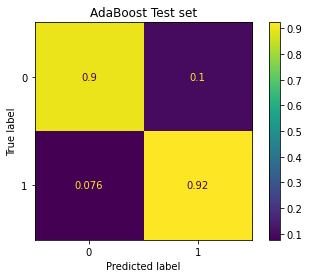

In [593]:
print("-------AdaBoost Test set Evaluation-------")
print_model_metrics(ada_final_mdl, X_test.values,y_test,"AdaBoost Test set")

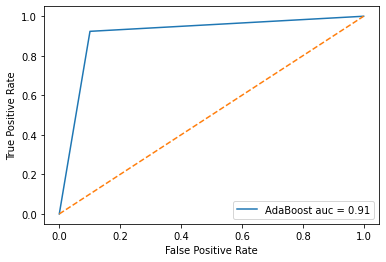

In [597]:
single_rocauc_curve(ada_final_mdl, X_test.values,y_test, "AdaBoost")

# Final Best Model Conclusion:<a class="anchor" id="conclusion"></a>

<div class="alert alert-success">
    
**EDA & Preprocessing**
   - In Part A, basic EDA was carried out like data summary, correlation analysis
   - As part of preprocessing and missing value imputation
    
**Modelling**
- In Part A, the Classification use-case was modelled with 3 Algorithms - DecisionTree, Random Forest, AdaBoost.
- Decision tree resulted betterm but generally Decision tree doesnt perform well on unseen data, so I go with AdaBoost classifier as the best model.
AdaBoost resulted, Train accuracy = 91% , Test accuracy = 91%, without overfitting.
- **Best Model = AdaBoost - Algorithm 3**
- So, in Part B, the test dataset is evaluated(predicted) and the results are written to excel named "P1_Test_Predictions.csv"
    
**Future scope**
- Better data understnding ( meaning of each column functionally)
- Outlier handling based on domain understandin

# Part B<a class="anchor" id="partb"></a>

In [647]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('P1_Test.csv')
test_df.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,1.5620,1,-4522.64,-10.78410,-6.7038,1,5.4270,-9.679,-18.566000,5.86600,...,5.761109,-11347.23,22929.33,-0.4,103741.46,4.0760,1466.0700,-4266.40,NaN,NaN
1,1.8400,1,-3893.64,-12.68850,-7.9830,0,4.5008,-11.561,-25.920000,3.18100,...,6.797000,-11289.36,25723.74,-1.4,103858.01,2.6546,1607.6600,-4802.48,-44.91,NaN
2,0.3782,1,-4916.46,-11.93910,-5.1132,1,5.3808,-13.281,-20.240000,3.04817,...,6.922000,-11133.06,23138.58,-0.4,105361.06,5.6300,1543.2200,-4220.46,-45.66,NaN
3,1.1410,0,-8705.44,-10.97370,-6.9564,1,6.5020,-12.101,-13.626000,3.28770,...,9.260000,-11773.53,23100.78,-0.4,103835.75,2.3680,1532.0397,-4612.88,-43.26,NaN
4,1.4360,1,-6963.44,-15.97800,-10.2420,1,4.2970,-11.596,-14.624000,3.55760,...,5.997600,-11937.06,27299.64,-1.4,103877.64,2.6908,1084.3200,-4557.08,-44.82,NaN
5,0.5494,1,-5234.24,-10.60332,-5.8017,1,6.1560,-11.400,-1.745000,3.06040,...,7.703000,-12663.36,22854.84,-1.4,103795.72,5.9200,1490.6400,-5650.08,-48.30,NaN
6,0.6483,0,-4873.00,-11.34420,-4.3818,0,4.1438,-7.197,-51.560000,3.41470,...,5.760033,-12384.66,31388.64,-1.4,103877.48,4.4040,1485.0800,-3358.68,NaN,NaN
7,2.4590,0,-6965.44,-11.26290,-8.6520,0,4.9574,-20.824,-56.980000,5.41800,...,5.832100,-11756.97,22994.61,-1.4,103877.22,2.5452,1485.0600,-4438.76,NaN,NaN
8,0.4837,1,-4708.72,-10.82610,-8.9910,0,9.6680,-18.146,-16.208000,3.01154,...,5.802190,-10955.16,23490.84,-1.4,103774.06,3.1834,1537.1280,-1931.48,-45.48,NaN
9,0.9784,1,-5049.44,-13.80600,-5.4939,0,8.3440,-8.720,-0.130082,3.53010,...,6.319000,-11318.46,23087.49,-0.4,103747.74,3.8546,1549.7900,-4573.68,-39.69,NaN


### Impute F21 column as it has lot of missing values using the imp object created in PART A

In [649]:
test_df1 = imp.transform(test_df)
test_df1 = pd.DataFrame(test_df1, index=test_df.index, columns=test_df.columns)
test_data = test_df1.iloc[:,:-1].copy()
test_data.head(5)

[IterativeImputer] Completing matrix with shape (1000, 22)
[IterativeImputer] Ending imputation round 1/1, elapsed time 0.00


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,1.5620,1.0,-4522.64,-10.7841,-6.7038,1.0,5.4270,-9.679,-18.566,5.86600,...,-1.84740,5.761109,-11347.23,22929.33,-0.4,103741.46,4.0760,1466.0700,-4266.40,-45.40041
1,1.8400,1.0,-3893.64,-12.6885,-7.9830,0.0,4.5008,-11.561,-25.920,3.18100,...,-2.91880,6.797000,-11289.36,25723.74,-1.4,103858.01,2.6546,1607.6600,-4802.48,-44.91000
2,0.3782,1.0,-4916.46,-11.9391,-5.1132,1.0,5.3808,-13.281,-20.240,3.04817,...,-3.90400,6.922000,-11133.06,23138.58,-0.4,105361.06,5.6300,1543.2200,-4220.46,-45.66000
3,1.1410,0.0,-8705.44,-10.9737,-6.9564,1.0,6.5020,-12.101,-13.626,3.28770,...,-6.14800,9.260000,-11773.53,23100.78,-0.4,103835.75,2.3680,1532.0397,-4612.88,-43.26000
4,1.4360,1.0,-6963.44,-15.9780,-10.2420,1.0,4.2970,-11.596,-14.624,3.55760,...,-1.64318,5.997600,-11937.06,27299.64,-1.4,103877.64,2.6908,1084.3200,-4557.08,-44.82000


### Predict with best model built in PART A

In [650]:
best_mdl = ada_final_mdl

In [651]:
predicted = best_mdl.predict (test_data) # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

### Write predictions to CSV

In [652]:
# Save to the destination file
test_df.to_csv('P1_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('P1_Test.csv').iloc[:,:-1].equals(pd.read_csv('P1_Test_Predictions.csv').iloc[:,:-1])

# Miscellaneous<a class="anchor" id="misc"></a>

# Extra Algorithms

<div class="alert alert-info">

# Gradient Boost Classifier<a class="anchor" id="gb"></a>

- GB builds an additive model in a forward stage-wise fashion
- It optimizes arbitrary differentiable loss functions. 

#### 4.4.1  GradientBoost -  Grid Search with KFold Cross Validation

In [636]:
# Grid search hyper parameters
gb_grid_params =  {
    "loss":[ 'exponential'],
    "learning_rate": [0.01, 0.001],
    "subsample":[0.5,  0.8,   1.0],
    "max_depth"          : [60,70],  
    "min_samples_split"  : [ 10,20,30], 
    'min_samples_leaf'   : [5,10,30],
    'max_leaf_nodes': [30,40,50,60]
    }

gb_mdl =GradientBoostingClassifier()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
clf_gb_grid = GridSearchCV(estimator=gb_mdl, cv=cv,param_grid=gb_grid_params, scoring='accuracy' ,n_jobs=-1,verbose=3)
clf_gb_grid.fit(X_train, y_train)
best_scores_gb_grid = clf_gb_grid.best_score_
best_params_gb_grid = clf_gb_grid.best_params_  
print("Best parameters:", best_params_gb_grid)
print("Best score:" , best_scores_gb_grid)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters: {'learning_rate': 0.001, 'loss': 'exponential', 'max_depth': 70, 'max_leaf_nodes': 30, 'min_samples_leaf': 10, 'min_samples_split': 20, 'subsample': 0.8}
Best score: 0.8906666666666666


#### 4.4.2 Gradient Boost - Fit with best hyper parameters

In [642]:
gb_final_mdl=GradientBoostingClassifier(learning_rate=0.01,subsample= 0.8, max_depth=60, loss='exponential', max_leaf_nodes=30,min_samples_leaf=5, min_samples_split=10)
gb_final_mdl.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, loss='exponential', max_depth=60,
                           max_leaf_nodes=30, min_samples_leaf=5,
                           min_samples_split=10, subsample=0.8)

#### 4.3.5 Gradient Boost - Evaluate Train set
- Gradient Boost resulted in 97% accuracy and ROC = 97%, which is good.

Model score accuracy-- 0.976
Balanced accuracy-- 0.976
Precision-- 0.9785522788203753
roc_auc_score-- 0.976
Recall_score-- 0.9733333333333334
f1- 0.9759358288770055
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       375
           1       0.98      0.97      0.98       375

    accuracy                           0.98       750
   macro avg       0.98      0.98      0.98       750
weighted avg       0.98      0.98      0.98       750

[[367   8]
 [ 10 365]]


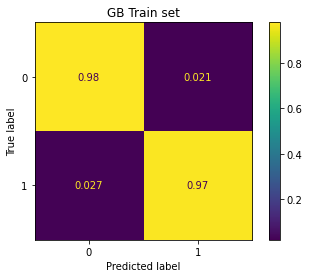

In [643]:
print_model_metrics(gb_final_mdl, X_train.values,y_train,"GB Train set")

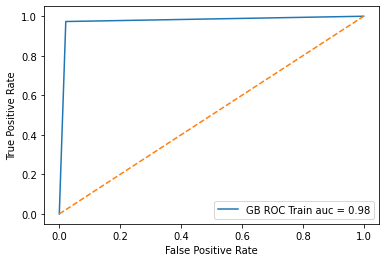

In [644]:
single_rocauc_curve(gb_final_mdl, X_train.values,y_train, "GB ROC Train")

#### 4.3.5 Gradient Boost - Evaluate Test set

- On Test set, gradient boost resulted in 90% accuracy and ROC = 0.9, the accuracy reduced as compared to train set. This means Gradient boost is over fitting.

Model score accuracy-- 0.9
Balanced accuracy-- 0.8991917377638078
Precision-- 0.8955223880597015
roc_auc_score-- 0.8991917377638078
Recall_score-- 0.916030534351145
f1- 0.9056603773584906
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       119
           1       0.90      0.92      0.91       131

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[105  14]
 [ 11 120]]


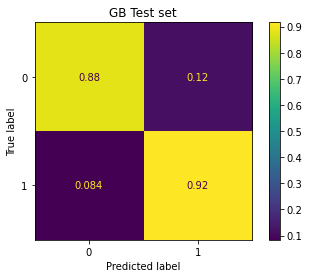

In [645]:
print_model_metrics(gb_final_mdl, X_test.values,y_test,"GB Test set")

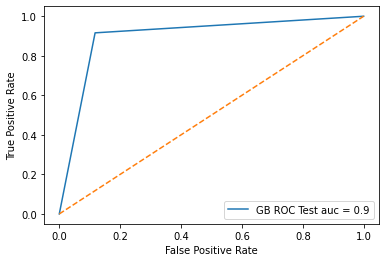

In [646]:
single_rocauc_curve(gb_final_mdl, X_test.values,y_test, "GB ROC Test")